In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from pathlib import Path
from aging.behavior.syllables import relabel_by_usage
from aging.plotting import figure, save_factory, PlotConfig, format_plots, ONTOGENY_AGE_CMAP, add_identity, legend
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
format_plots()
c = PlotConfig()

In [3]:
## update data
def filter_df(df):
    max=39
    #df.drop('9c060c9b-9eee-4788-90be-803700bbacd8',level=3, axis=0, inplace=True)
    syll=df.columns.values[df.columns.values>max]
    df.drop(syll,axis=1, inplace=True)
    return df[~df.index.get_level_values('session_name').str.contains('CRL')]

In [4]:
from matplotlib.colors import LinearSegmentedColormap
# Define the color map
colors = ['#dadaeb','#6a51a3']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmm=custom_cmap

# Define the color map
colors = ['#fee6ce','#d94801']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmf=custom_cmap

colors = ['#c7eae5','#008C8D']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmm=custom_cmap

In [5]:
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/dana_ontogeny_males_relabeled_usage_matrix_v00.parquet')
df_dana = pd.read_parquet(path)

path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_relabeled_usage_matrix_v00.parquet')
df = pd.read_parquet(path)

# arrange data
data = df.astype(float, errors='ignore')
data= filter_df(data).groupby(['age','uuid']).mean()
data['data'] = 'min'
data.set_index('data', inplace=True, append=True)

data_dana = df_dana.astype(float, errors='ignore')
data_dana= filter_df(data_dana).groupby(['age','uuid']).mean()
data_dana['data'] = 'dana'
data_dana.set_index('data', inplace=True, append=True)

data_all = pd.concat([data,data_dana])
# choose 16 mice from all dataset
n=16
data_all = data_all.groupby('age').apply(lambda x: x.sample(n=n,replace=False) if len(x)>n else x.sample(n=len(x),replace=False)).reset_index(level=0, drop=True)
data_all = data_all.query('age<100')

In [6]:
usage_mtx= data_all.copy()
data_labels = usage_mtx.index.get_level_values('age').to_numpy()

In [7]:
usage_mtx.index.get_level_values('age').unique()

Index([ 3,  4,  5,  7,  8,  9, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56,
       60, 64, 68, 72, 78, 80, 84, 90],
      dtype='int64', name='age')

## Cluster syllable usage male

In [8]:
from sklearn.cluster import KMeans

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0 [Index([0, 3, 4, 28, 19, 38, 34, 18, 17, 8, 36, 2, 37, 10, 30, 6], dtype='object')]
Cluster 1 [Index([5, 11, 32, 13, 33, 39, 35, 16, 21, 29, 14, 22, 27, 25, 31], dtype='object')]
Cluster 2 [Index([12, 20, 9, 7, 23, 26, 15, 1, 24], dtype='object')]


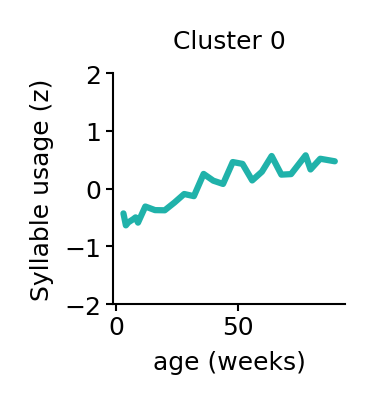

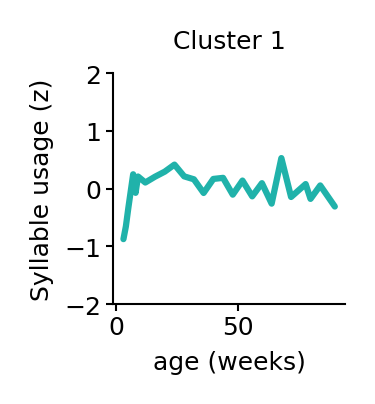

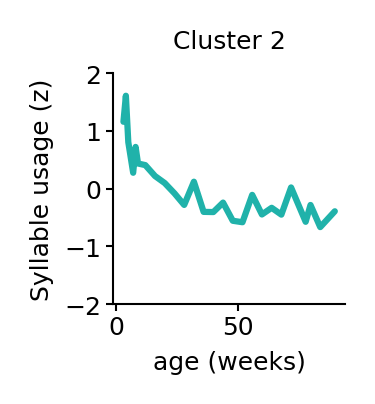

In [9]:
n_clusters = 3
clusters = KMeans(n_clusters=n_clusters, random_state=0).fit_predict(StandardScaler().fit_transform(usage_mtx).T)
scaled_df = pd.DataFrame(StandardScaler().fit_transform(usage_mtx), index=usage_mtx.index, columns=usage_mtx.columns.to_numpy())
for i in range(n_clusters):
    fig = figure(1, 1)
    tmp = scaled_df.iloc[:, clusters == i].groupby('age').mean()
    print(f'Cluster {i}', [tmp.columns])
    #plt.plot(tmp, c='k', lw=0.75, alpha=0.15)
    plt.plot(tmp, c='w', lw=0.75,linestyle='--')
    plt.plot(tmp.mean(1), c='#20B2AA', lw=1.5)
    plt.title(f'Cluster {i}')
    plt.xlabel('age (weeks)')
    plt.ylabel('Syllable usage (z)')
    plt.ylim([-2,2])
    sns.despine()
    fig.savefig(c.dana_save_path / "simons"/ f'male_cluster-{i}.pdf')

In [10]:
## for females

In [11]:
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/dana_ontogeny_females_relabeled_usage_matrix_v00.parquet')
df_dana = pd.read_parquet(path)

path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_females_relabeled_usage_matrix_v00.parquet')
df = pd.read_parquet(path)

# arrange data
data = df.astype(float, errors='ignore')
data= filter_df(data).groupby(['age','uuid']).mean()
data['data'] = 'min'
data.set_index('data', inplace=True, append=True)

data_dana = df_dana.astype(float, errors='ignore')
data_dana= filter_df(data_dana).groupby(['age','uuid']).mean()
data_dana['data'] = 'dana'
data_dana.set_index('data', inplace=True, append=True)

data_all = pd.concat([data,data_dana])
# choose 16 mice from all dataset
n=16
data_all = data_all.groupby('age').apply(lambda x: x.sample(n=n,replace=False) if len(x)>n else x.sample(n=len(x),replace=False)).reset_index(level=0, drop=True)
data_all = data_all.query('age<100')

In [12]:
usage_mtx= data_all.copy()
data_labels = usage_mtx.index.get_level_values('age').to_numpy()

In [13]:
usage_mtx.index.get_level_values('age').unique()

Index([ 3,  4,  5,  7,  8,  9, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56,
       60, 64, 68, 72, 78, 80, 84, 90],
      dtype='int64', name='age')

## Cluster syllable usage male

In [14]:
from sklearn.cluster import KMeans

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0 [Index([20, 9, 7, 23, 26, 15, 1, 24], dtype='object')]
Cluster 1 [Index([5, 11, 33, 28, 38, 39, 18, 35, 36, 21, 29, 14, 22, 27, 25, 31], dtype='object')]
Cluster 2 [Index([0, 3, 12, 32, 13, 4, 19, 34, 17, 8, 16, 2, 37, 10, 30, 6], dtype='object')]


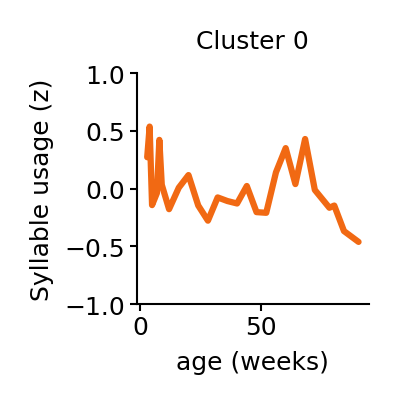

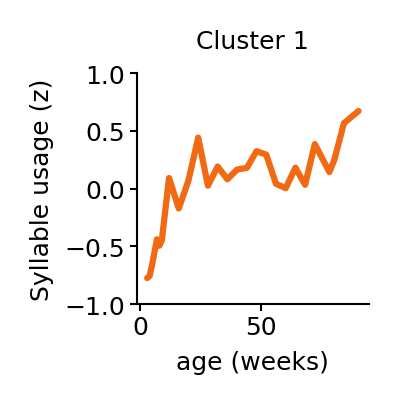

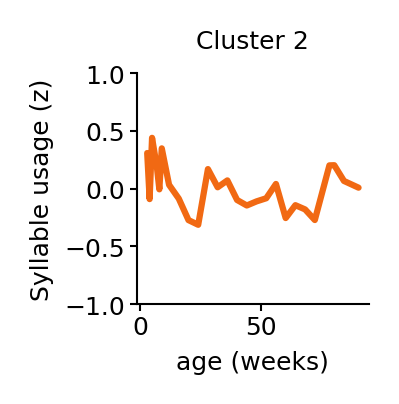

In [15]:
n_clusters = 3
clusters = KMeans(n_clusters=n_clusters, random_state=0).fit_predict(StandardScaler().fit_transform(usage_mtx).T)
scaled_df = pd.DataFrame(StandardScaler().fit_transform(usage_mtx), index=usage_mtx.index, columns=usage_mtx.columns.to_numpy())
for i in range(n_clusters):
    fig = figure(1, 1)
    tmp = scaled_df.iloc[:, clusters == i].groupby('age').mean()
    print(f'Cluster {i}', [tmp.columns])
    #plt.plot(tmp, c='k', lw=0.75, alpha=0.15)
    plt.plot(tmp, c='w', lw=0.75,linestyle='--')
    plt.plot(tmp.mean(1), c='#f16913', lw=1.5)
    plt.title(f'Cluster {i}')
    plt.xlabel('age (weeks)')
    plt.ylabel('Syllable usage (z)')
    plt.ylim([-1,1])
    sns.despine()
    fig.savefig(c.dana_save_path / "simons"/ f'female_cluster-{i}.pdf')